In [1]:
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\giova\AppData\Local\Tesseract-OCR\tesseract.exe'

#### Com pre-processamento

In [3]:
def ocr_core(img):
    myconfig = r"--psm 6"
    text = pytesseract.image_to_string(img, config=myconfig, lang='eng+equ')
    return text

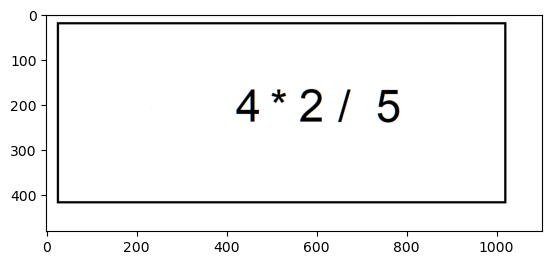

In [5]:
img = cv.imread('img22.png')
plt.imshow(img, 'gray', vmin=0, vmax=255)

In [6]:
# get grayscale
def get_grayscale(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [7]:
# noise removal
def remove_noise(image):
    return cv.medianBlur(image, 5)

In [8]:
# thresholding
def thresholding(image):
    return cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]

In [9]:
img = get_grayscale(img)
img = thresholding(img)
img = remove_noise(img)

In [10]:
print(ocr_core(img))

4*2/ 5



#### Sem pre-processamento

In [11]:
from pytesseract import Output
import numpy as np

In [12]:
img = cv.imread('img22.png')
kernel = np.ones((3, 3), np.uint8)
img = cv.erode(img, kernel, iterations=1)

In [13]:
height, width, _ = img.shape

In [14]:
#myconfig = r"--psm 11 --oem 3"
#myconfig = r"--psm 6"
myconfig = r"--psm 11 --oem 3"

In [15]:
boxes = pytesseract.image_to_boxes(img, lang='eng+equ', config=myconfig)

In [16]:
boxes

'4 422 241 474 314 0\n* 500 282 535 314 0\n2 564 241 614 315 0\n/ 648 239 786 314 0\n5 712 212 784 319 0\n'

In [17]:
data = pytesseract.image_to_data(img, lang='eng+equ', config=myconfig, output_type=Output.DICT)

In [18]:
data

{'level': [1, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2],
 'left': [0, 422, 422, 422, 422, 712],
 'top': [0, 165, 165, 165, 165, 161],
 'width': [1102, 364, 364, 364, 364, 72],
 'height': [480, 76, 76, 76, 76, 107],
 'conf': [-1, -1, -1, -1, 90, 96],
 'text': ['', '', '', '', '4*2/', '5']}

In [19]:
print(ocr_core(img))

4*2/ 5



In [20]:
eval(ocr_core(img))

1.6